In [1]:
import numpy as np 
from matplotlib import pyplot as plt 
import pandas as pd
np.random.seed(903378735)

In [2]:
from gen_training_data import describe_data
data =  pd.read_csv('all_data_compiled.csv')
#print(data)
describe_data(data)
x = data.drop(['index_compiled' , 'class'] , axis=1)
y = data['class']
#print(x.shape)

Total Number of Sources :  1938
Number of Features :  426
Class 0 sources : 564
Class 1 sources : 431
Class 2 sources : 943


In [3]:
def split_data(x,y,s):   
    x =  x.to_numpy()
    y =  y.to_numpy()
    split = s
    split_no = int(split*len(y))
    x_train = x[:split_no, :]
    y_train = y[:split_no]
    x_test = x[split_no:, :]
    y_test = y[split_no:]
    return ((x_train,y_train) , (x_test ,y_test))

(x_train,y_train),(x_test,y_test) = split_data(x, y, 0.7)
_ , (x_test_copy , y_test_copy) = split_data(x, y, 0.7)
print(x_train.shape ,y_train.shape)
print(x_test.shape ,y_test.shape)

(x_test_copy , y_test_copy) , (a,b) = split_data(x, y, 0.7)
np.shape(x_test_copy)

(1356, 424) (1356,)
(582, 424) (582,)


(1356, 424)

# Neural Netork starts here

In [4]:
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical

In [5]:
one_hot_y_train =  to_categorical(y_train)
one_hot_y_test =  to_categorical(y_test)

In [10]:
np.random.seed(903378735)
def model_gen(shape , input_len):

    inputs =  keras.Input(shape=(input_len,))
    dense =  layers.Dense(64, activation='relu')
    x = dense(inputs)
    x =  layers.BatchNormalization(axis=-1)(x)
    #x = layers.Dropout(0.3)(x)
    for s in shape:
        x = layers.Dense(s, activation='relu')(x)
    x =  layers.BatchNormalization(axis=-1)(x)
    outputs = layers.Dense(3 , activation='sigmoid')(x)
    model = keras.Model(inputs=inputs , outputs=outputs , name='trial_model')
    np.random.seed(903378735)
    model.compile(
        loss = "categorical_crossentropy",
        optimizer = keras.optimizers.SGD(),
        metrics = ["accuracy"],
    )
    return model
model = model_gen([64,64,64,32,32] , x_train.shape[1])
history = model.fit(x_train, one_hot_y_train, batch_size=64, epochs=80, validation_split=0.2)


Epoch 1/80
17/17 [==============================] - 1s 16ms/step - loss: 0.9563 - accuracy: 0.5710 - val_loss: 1.0751 - val_accuracy: 0.5404
Epoch 2/80
17/17 [==============================] - 0s 4ms/step - loss: 0.6311 - accuracy: 0.7712 - val_loss: 1.0573 - val_accuracy: 0.5221
Epoch 3/80
17/17 [==============================] - 0s 5ms/step - loss: 0.5195 - accuracy: 0.8293 - val_loss: 1.0426 - val_accuracy: 0.5404
Epoch 4/80
17/17 [==============================] - 0s 5ms/step - loss: 0.4403 - accuracy: 0.8644 - val_loss: 1.0272 - val_accuracy: 0.5368
Epoch 5/80
17/17 [==============================] - 0s 6ms/step - loss: 0.4006 - accuracy: 0.8819 - val_loss: 1.0085 - val_accuracy: 0.5368
Epoch 6/80
17/17 [==============================] - 0s 5ms/step - loss: 0.3418 - accuracy: 0.8958 - val_loss: 0.9902 - val_accuracy: 0.5404
Epoch 7/80
17/17 [==============================] - 0s 5ms/step - loss: 0.3050 - accuracy: 0.9114 - val_loss: 0.9683 - val_accuracy: 0.5588
Epoch 8/80
17/17 [=

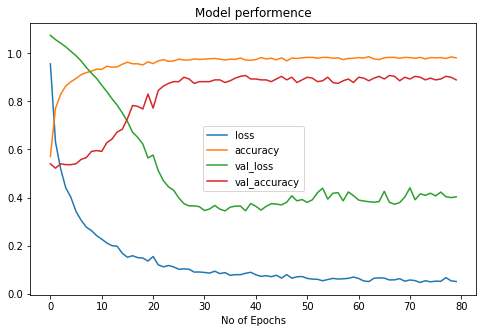

In [11]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.xlabel("No of Epochs")
plt.title('Model performence')
plt.savefig('plots/bn_model_level_0_rows.png')
plt.show()

In [96]:
model.summary()

Model: "trial_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 424)]             0         
_________________________________________________________________
dense_30 (Dense)             (None, 64)                27200     
_________________________________________________________________
batch_normalization_8 (Batch (None, 64)                256       
_________________________________________________________________
dense_31 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_32 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_33 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_34 (Dense)             (None, 8)                 

In [12]:
def acc_score(model , y_test , x_test):
    print('----inside acc function')
    print(np.shape(x_test))
    y_pred = model.predict(x_test)
    print(np.shape(y_pred))
    print(np.shape(y_test))
    y_pred = [np.argmax(r) for r in y_pred]
    y_test = [np.argmax(r) for r in y_test]
    correct = 0
    total =  len(y_test)
    for y1,y2 in zip(y_pred,y_test):
        if(int(y1)==int(y2)):
            correct+=1
        else:
            continue
    print('correct prediction :' , correct)
    print('total prediction :' , total)
    print('Score {:.2F}'.format(correct/total*100))
    return(correct/total*100)
print('training data prediction')
acc_score(model, one_hot_y_train, x_train)
print('----------------------------------')
print('test data prediciton')
acc_score(model, one_hot_y_test, x_test)

training data prediction
----inside acc function
(1356, 424)
(1356, 3)
(1356, 3)
correct prediction : 1309
total prediction : 1356
Score 96.53
----------------------------------
test data prediciton
----inside acc function
(582, 424)
(582, 3)
(582, 3)
correct prediction : 517
total prediction : 582
Score 88.83


88.8316151202749

## Feature reshuffling

In [13]:
'''
(x_test_copy , y_test_copy) , (a,b) = split_data(x, y, 0.7)
print(np.shape(x_test_copy))
oh_y =  to_categorical(y_test_copy)
s = acc_score(model, oh_y, x_test_copy)
'''
acc_list = []

for index in range(413):
    (x_test_copy , y_test_copy) , (a,b) = split_data(x, y, 0.7)
    np.shape(x_test_copy)
    oh_y =  to_categorical(y_test_copy)
    acc_score(model, oh_y, x_test_copy)
    temp = x_test_copy[:,index]
    print(temp[:10])
    x_test_copy[:,index] = np.zeros(np.shape(x_test_copy[:,index]))
    temp = x_test_copy[:,index]
    s = acc_score(model, oh_y, x_test_copy)
    acc_list.append(s)
    print(temp[:10])

----inside acc function
(1356, 424)
(1356, 3)
(1356, 3)
correct prediction : 1309
total prediction : 1356
Score 96.53
[2.71e-14 8.99e-15 0.00e+00 4.13e-13 9.51e-13 1.14e-16 0.00e+00 9.94e-17
 0.00e+00 0.00e+00]
----inside acc function
(1356, 424)
(1356, 3)
(1356, 3)
correct prediction : 1309
total prediction : 1356
Score 96.53
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
----inside acc function
(1356, 424)
(1356, 3)
(1356, 3)
correct prediction : 1309
total prediction : 1356
Score 96.53
[5.37753223e-05 1.76611418e-05 6.79558011e-07 7.67955801e-04
 1.87845304e-03 3.11233886e-07 0.00000000e+00 3.24125230e-07
 0.00000000e+00 1.07182320e-07]
----inside acc function
(1356, 424)
(1356, 3)
(1356, 3)
correct prediction : 1309
total prediction : 1356
Score 96.53
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
----inside acc function
(1356, 424)
(1356, 3)
(1356, 3)
correct prediction : 1309
total prediction : 1356
Score 96.53
[4.61111111e-05 1.55555556e-05 0.00000000e+00 7.59259259e-04
 1.61666667e-03 1.10555556e-07 0.00000

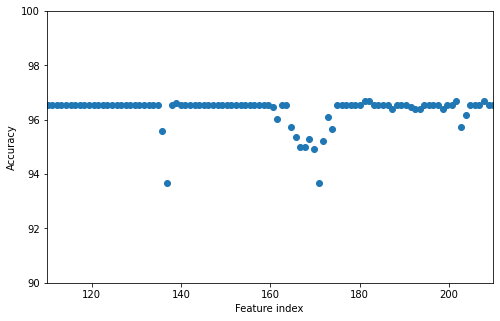

75
B_B_KP_INTRA_PROB
B_B_KS_INTRA_PROB
B_B_VAR_INTRA_INDEX
B_B_VAR_INTRA_PROB
B_BII
B_BREMS_KT
B_ERROR_ELLIPSE_ANGLE
B_ERROR_ELLIPSE_R0
B_ERROR_ELLIPSE_R1
B_H_KP_INTRA_PROB
B_H_KS_INTRA_PROB
B_H_VAR_INTRA_PROB
B_HARDNESS_RATIO_HM
B_HARDNESS_RATIO_HM_HI
B_HARDNESS_RATIO_HM_LO
B_HARDNESS_RATIO_HS
B_HARDNESS_RATIO_HS_HI
B_HARDNESS_RATIO_HS_LO
B_HARDNESS_RATIO_MS
B_HARDNESS_RATIO_MS_LO
B_M_KP_INTRA_PROB
B_NH_GAL
B_S_KP_INTRA_PROB
B_S_KS_INTRA_PROB
B_U_KP_INTRA_PROB
B_U_KS_INTRA_PROB
B_VAR_INTER_HARD_PROB_HS
B_W_KS_INTRA_PROB
------------------------------------


In [30]:
plt.figure(figsize=(8,5))
y_index = np.linspace(0,424, len(acc_list))
plt.scatter(y_index,acc_list)
plt.xlabel('Feature index ')
plt.ylabel('Accuracy')
plt.savefig('plots/acc.png')
plt.ylim(90,100)
plt.xlim(110,210)
plt.show()
print(np.argmin(acc_list))
curr_rows =  pd.read_csv('rows/current_rows.csv' , names=['index','name'] , delimiter=' ')
acc_max = np.average(acc_list)
for i in range(len(acc_list)):
    if(acc_list[i]<0.995*acc_max):
        print(curr_rows.iloc[i]['name'])
print('------------------------------------')
for i in range(len(acc_list)):
    if(acc_list[i]>1.01*acc_max):
        print(curr_rows.iloc[i]['name'])
#print(curr_rows.iloc[66])

In [100]:
_ , (x_test_copy , y_test_copy) = split_data(x, y, 0.7)
index = 100
temp = x_test_copy[:,index]
print(temp[:10])
x_test_copy[:,index] =  np.zeros(temp.shape)
print(x_test_copy[:,index][:10])
x_test_copy[:,index] = temp 
print(x_test_copy[:,index][:10])

[0.00000000e+00 5.43967280e-04 0.00000000e+00 2.71983640e-06
 0.00000000e+00 0.00000000e+00 1.20654397e-03 1.08179959e-05
 0.00000000e+00 0.00000000e+00]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


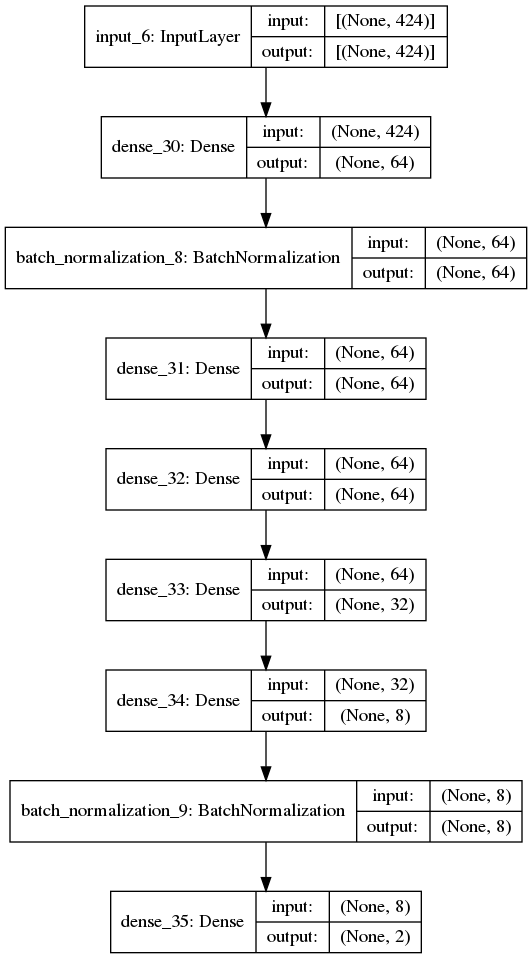

In [101]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='plots/model_plot.png', show_shapes=True, show_layer_names=True)

In [102]:
curr_rows =  pd.read_csv('rows/current_rows.csv' )
print(curr_rows.iloc[66])

0 B_B_FLUX_AP    67 B_BB_KT_HI
Name: 66, dtype: object
